In [187]:
# Load required libraries
install.packages("glmnet")
install.packages("caret")
install.packages("ROSE")
install.packages('EFAtools')
install.packages('psych')
install.packages("corrplot")
library(dplyr) # For data manipulation
library(ggplot2) # For visualization
library(glmnet)
library(caret)
library(tidyr)
library(ROSE)
library(EFAtools)
library(psych)
library(corrplot)

Warning message:
"package 'glmnet' is in use and will not be installed"
Warning message:
"package 'caret' is in use and will not be installed"
Warning message:
"package 'ROSE' is in use and will not be installed"
Warning message:
"package 'EFAtools' is in use and will not be installed"
Warning message:
"package 'psych' is in use and will not be installed"
Warning message:
"package 'corrplot' is in use and will not be installed"


**DATA COLLECTION AND DESCRIPTION**

In [188]:
fraud <- read.csv('fraud.csv')

In [189]:
head(fraud)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0,-0.6980436,-0.04419812,1.6811673,0.9745233,-0.245692619,0.34715606,0.19516625,0.08370937,0.3320762,⋯,-0.02528877,0.38346201,-0.17712600,0.1105104,0.2466123,-0.3923114,0.33748690,-0.06418093,149.62,0
2,0,0.6118281,0.16162642,0.1103481,0.3168994,0.043585540,-0.06183566,-0.06418938,0.07217789,-0.2331601,⋯,-0.31188331,-0.88147339,0.16239800,-0.5611484,0.3207289,0.2611633,-0.02269927,0.04488712,2.69,0
3,1,-0.6972977,-0.81384628,1.1753368,0.2685503,-0.365428546,1.35179670,0.64468863,0.21006306,-1.3826241,⋯,0.34258177,1.06504576,1.45808689,-1.1381284,-0.6286053,-0.2885504,-0.13987025,-0.18215547,378.66,0
4,1,-0.4960260,-0.11248295,1.1884502,-0.6104519,-0.007486433,0.93638751,0.19354560,0.32011743,-1.2661192,⋯,-0.14960499,0.00727844,-0.30514637,-1.9410890,1.2420391,-0.4603827,0.15849354,0.18735562,123.50,0
5,2,-0.5945675,0.53302677,1.0265370,0.2849940,-0.295708736,0.07201686,0.48298296,-0.22944885,0.7464582,⋯,-0.01302746,1.10175693,-0.22039050,0.2332575,-0.3952447,1.0419856,0.55445514,0.65590152,69.99,0
6,2,-0.2186654,0.58330073,0.7563618,-0.1189747,0.305725744,-0.02231914,0.38789196,0.22078229,-0.5191011,⋯,-0.28767899,-0.77265121,-0.04232414,-0.6132929,-0.4466323,0.2197161,0.64143563,0.24717586,3.67,0


In [190]:
tail(fraud)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
283721,172785,0.06176323,0.56537527,-0.3619134,-0.5268740,0.820847627,-0.1771663,0.66200698,0.09761454,-0.1862756,⋯,-0.4340387,-1.1158925,0.08071584,0.16974085,-0.8362492,0.2573968,0.550709375,0.20974925,2.69,0
283722,172786,-6.09905464,6.11633378,-6.5187919,-1.4613768,-3.895744755,-1.9571871,-4.00615791,6.19592603,1.7475504,⋯,0.2948630,0.1543905,1.62654486,-0.84102708,2.7566211,0.5186863,2.384499716,2.51117120,0.77,0
283723,172787,-0.37616983,-0.03344895,1.3488793,-0.5222719,0.630518648,0.7946475,0.01981788,0.25008913,0.5338239,⋯,0.2959008,1.2758029,0.01998235,-1.67797370,-1.1638533,-0.8199412,0.173022183,-0.16318002,24.79,0
283724,172788,0.98538976,-0.18294365,-2.1539595,-0.3944523,1.910311768,2.2758394,-0.24178159,0.60083502,0.3947577,⋯,0.3205443,0.7980521,-0.06012620,1.05697765,0.5098524,-0.1812469,0.011256705,-0.08097157,67.88,0
283725,172788,-0.12342753,0.32214827,0.4656450,0.4877719,-0.274479929,0.4682734,-0.55893147,0.57600857,0.3579091,⋯,0.3664062,1.1042002,-0.26182030,0.20343430,-1.0919737,1.1340424,0.274977681,0.31867178,10.00,0
283726,172792,-0.27382206,-0.11522013,0.4661933,-0.3579953,-0.009110823,-0.4877256,1.28455863,-0.35168046,0.4437999,⋯,0.3606216,0.8875551,0.60409745,0.01452608,-0.9087303,-1.6974632,-0.006103212,0.04160917,217.00,0


In [191]:
nrow(fraud) 

[1] 283726

In [192]:
ncol(fraud)

[1] 31

In [193]:
names(fraud)

[1] "Time"   "V1"     "V2"     "V3"     "V4"     "V5"     "V6"     "V7"    
 [9] "V8"     "V9"     "V10"    "V11"    "V12"    "V13"    "V14"    "V15"   
[17] "V16"    "V17"    "V18"    "V19"    "V20"    "V21"    "V22"    "V23"   
[25] "V24"    "V25"    "V26"    "V27"    "V28"    "Amount" "Class"

In [194]:
str(fraud)

'data.frame':	283726 obs. of  31 variables:
 $ Time  : num  0 0 1 1 2 2 4 7 7 9 ...
 $ V1    : num  -0.698 0.612 -0.697 -0.496 -0.595 ...
 $ V2    : num  -0.0442 0.1616 -0.8138 -0.1125 0.533 ...
 $ V3    : num  1.68 0.11 1.18 1.19 1.03 ...
 $ V4    : num  0.975 0.317 0.269 -0.61 0.285 ...
 $ V5    : num  -0.24569 0.04359 -0.36543 -0.00749 -0.29571 ...
 $ V6    : num  0.3472 -0.0618 1.3518 0.9364 0.072 ...
 $ V7    : num  0.1952 -0.0642 0.6447 0.1935 0.483 ...
 $ V8    : num  0.0837 0.0722 0.2101 0.3201 -0.2294 ...
 $ V9    : num  0.332 -0.233 -1.383 -1.266 0.746 ...
 $ V10   : num  0.0843 -0.1551 0.1929 -0.0511 0.6996 ...
 $ V11   : num  -0.541 1.583 0.613 -0.222 -0.808 ...
 $ V12   : num  -0.6211 1.0709 0.0664 0.1792 0.5411 ...
 $ V13   : num  -0.996 0.491 0.721 0.51 1.352 ...
 $ V14   : num  -0.327 -0.151 -0.174 -0.302 -1.176 ...
 $ V15   : num  1.605 0.695 2.564 -0.69 0.191 ...
 $ V16   : num  -0.538 0.531 -3.308 -1.213 -0.517 ...
 $ V17   : num  0.247 -0.136 1.317 -0.812 -0.281 ...

In [195]:
summary(fraud)

      Time              V1                   V2                  V3           
 Min.   :     0   Min.   :-28.956239   Min.   :-44.15838   Min.   :-32.03166  
 1st Qu.: 54205   1st Qu.: -0.470195   1st Qu.: -0.36456   1st Qu.: -0.58971  
 Median : 84693   Median :  0.010464   Median :  0.03883   Median :  0.11928  
 Mean   : 94811   Mean   :  0.003038   Mean   : -0.00251   Mean   :  0.00107  
 3rd Qu.:139298   3rd Qu.:  0.675590   3rd Qu.:  0.48599   3rd Qu.:  0.68070  
 Max.   :172792   Max.   :  1.260214   Max.   : 13.39509   Max.   :  6.21904  
       V4                  V5                  V6           
 Min.   :-4.018693   Min.   :-82.60176   Min.   :-19.64104  
 1st Qu.:-0.601148   1st Qu.: -0.50096   1st Qu.: -0.57738  
 Median :-0.015732   Median : -0.03883   Median : -0.20659  
 Mean   :-0.002098   Mean   :  0.00133   Mean   : -0.00086  
 3rd Qu.: 0.523020   3rd Qu.:  0.44460   3rd Qu.:  0.29791  
 Max.   :11.932920   Max.   : 25.27339   Max.   : 55.03412  
       V7           

In [196]:
# Calculate summary statistics and tidy the output format
summary_metrics_time_amount <- fraud %>%
  summarise(across(c(Time, Amount,Class, V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V24,V25,V26,V27,V28), list(
    Mean = ~mean(., na.rm = TRUE),
    SD = ~sd(., na.rm = TRUE),
    Min = ~min(., na.rm = TRUE),
    Max = ~max(., na.rm = TRUE)
  ), .names = "{.col}_{.fn}")) %>%
  pivot_longer(
    cols = everything(),
    names_to = c("Variable", "Metric"),
    names_sep = "_"
  ) %>%
  pivot_wider(names_from = Metric, values_from = value)

# Print the result
summary_metrics_time_amount

Variable,Mean,SD,Min,Max
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Time,9.481108e+04,4.748105e+04,0.000000,1.727920e+05
Amount,8.847269e+01,2.503994e+02,0.000000,2.569116e+04
Class,1.667101e-03,4.079618e-02,0.000000,1.000000e+00
V1,3.037510e-03,1.000000e+00,-28.956239,1.260214e+00
V2,-2.510930e-03,1.000000e+00,-44.158375,1.339509e+01
V3,1.069224e-03,1.000000e+00,-32.031662,6.219043e+00
V4,-2.097540e-03,1.000000e+00,-4.018693,1.193292e+01
V5,1.327196e-03,1.000000e+00,-82.601759,2.527339e+01
V6,-8.555162e-04,1.000000e+00,-19.641043,5.503412e+01


In [197]:
# Summary statistics for categorical variable (Class)
table(fraud$Class)


     0      1 
283253    473 

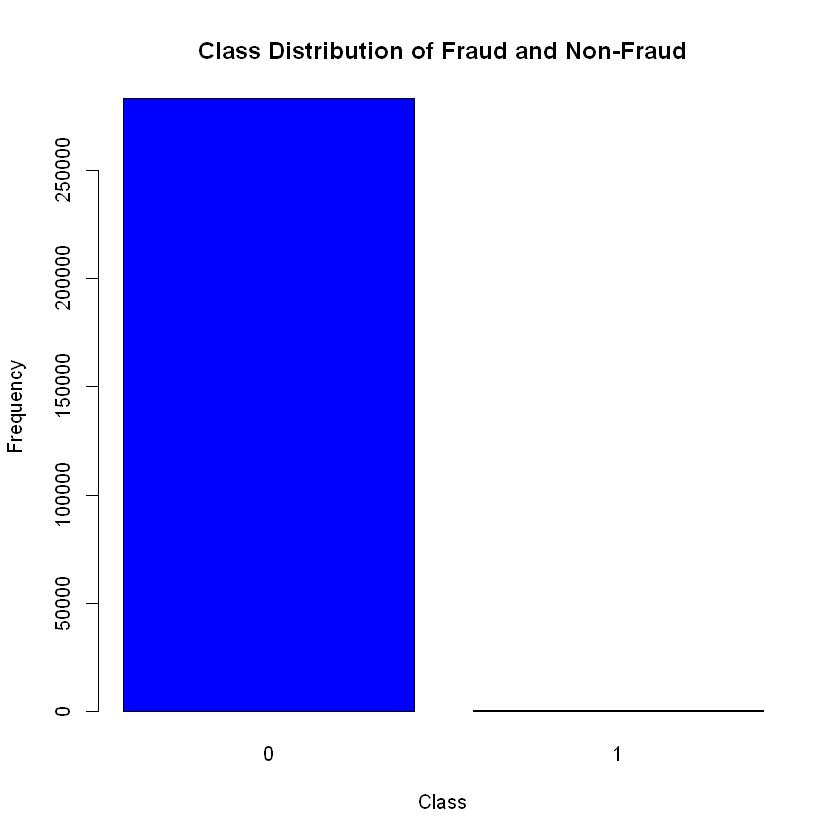

In [198]:
# Calculate the frequency of each class
class_freq <- table(fraud$Class)

# Plot the class distribution using a barplot
barplot(class_freq, 
        main = "Class Distribution of Fraud and Non-Fraud", 
        xlab = "Class", 
        ylab = "Frequency", 
        col = "blue")


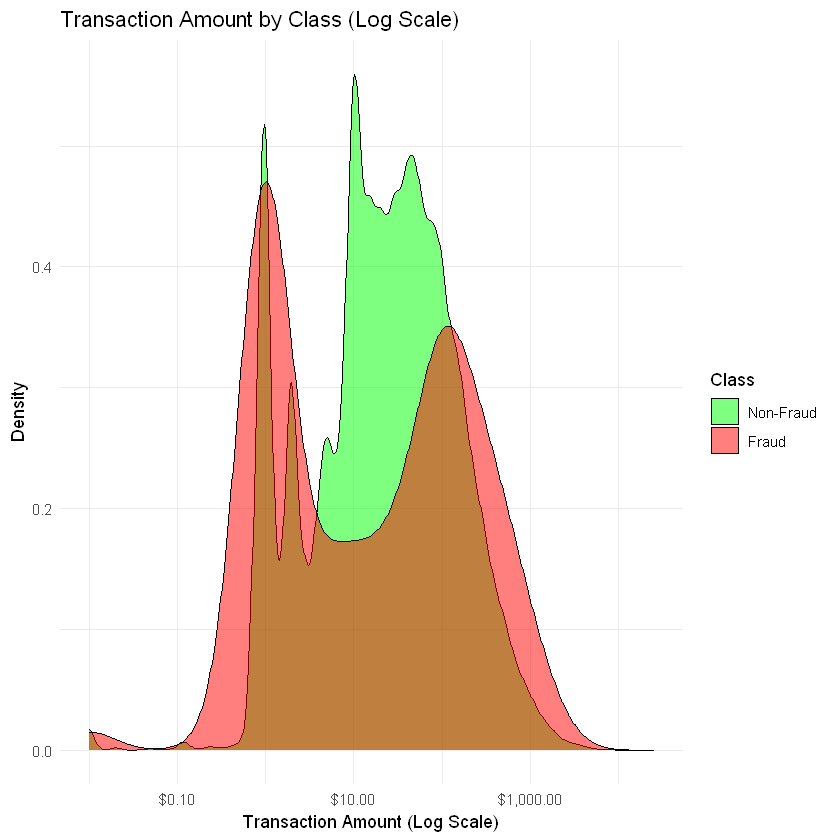

In [199]:
# Ensure 'Class' column is a factor with levels '0' and '1'
fraud$Class <- as.factor(fraud$Class)
levels(fraud$Class) <- c("0", "1")

# Filter out transactions with zero or negative amounts
fraud_data <- fraud[fraud$Amount > 0, ]

# Plot the data
ggplot(fraud_data, aes(x = Amount, fill = Class)) +
  geom_density(alpha = 0.5, adjust = 1) +
  scale_x_log10(labels = scales::dollar) +
  scale_fill_manual(values = c("0" = "green", "1" = "red"), labels = c("Non-Fraud", "Fraud")) +
  labs(x = "Transaction Amount (Log Scale)", y = "Density", fill = "Class", title = "Transaction Amount by Class (Log Scale)") +
  theme_minimal()

***Histogram Distribution**

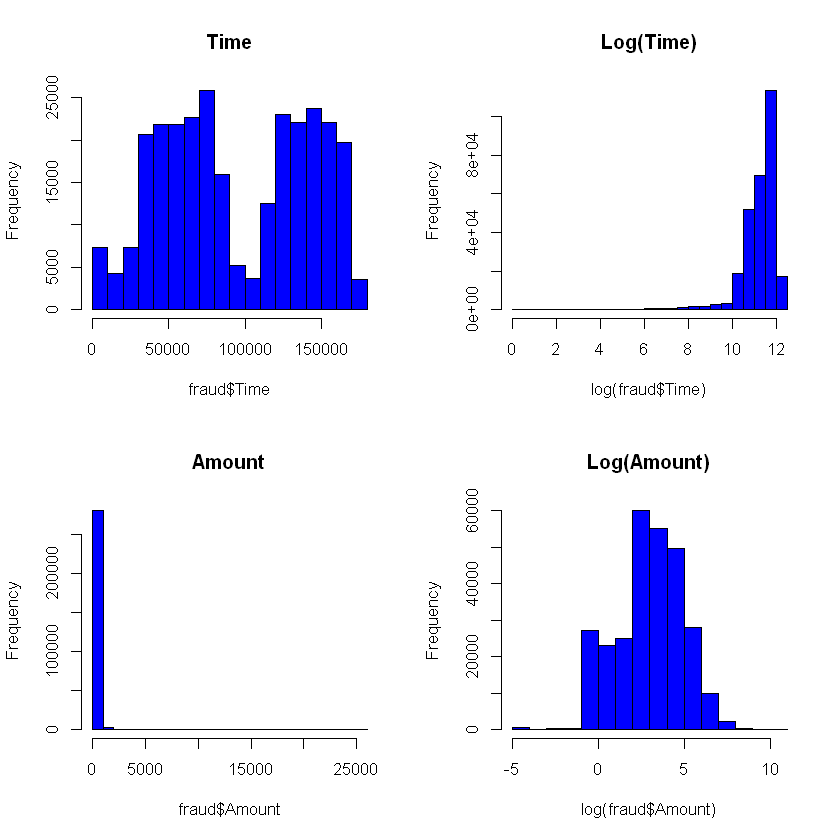

In [200]:
# Set up a 2x2 layout
par(mfrow=c(2,2))

# Plot histograms
hist(fraud$Time, main="Time", col="blue")
hist(log(fraud$Time), main="Log(Time)", col="blue")
hist(fraud$Amount, main="Amount", col="blue")
hist(log(fraud$Amount), main="Log(Amount)", col="blue")

**CHECK FOR MISSING VALUES**

In [201]:
# Check for missing values
colSums(is.na(fraud))

Time     V1     V2     V3     V4     V5     V6     V7     V8     V9    V10 
     0      0      0      0      0      0      0      0      0      0      0 
   V11    V12    V13    V14    V15    V16    V17    V18    V19    V20    V21 
     0      0      0      0      0      0      0      0      0      0      0 
   V22    V23    V24    V25    V26    V27    V28 Amount  Class 
     0      0      0      0      0      0      0      0      0

**CHECK TO REMOVE OUTLIERS**

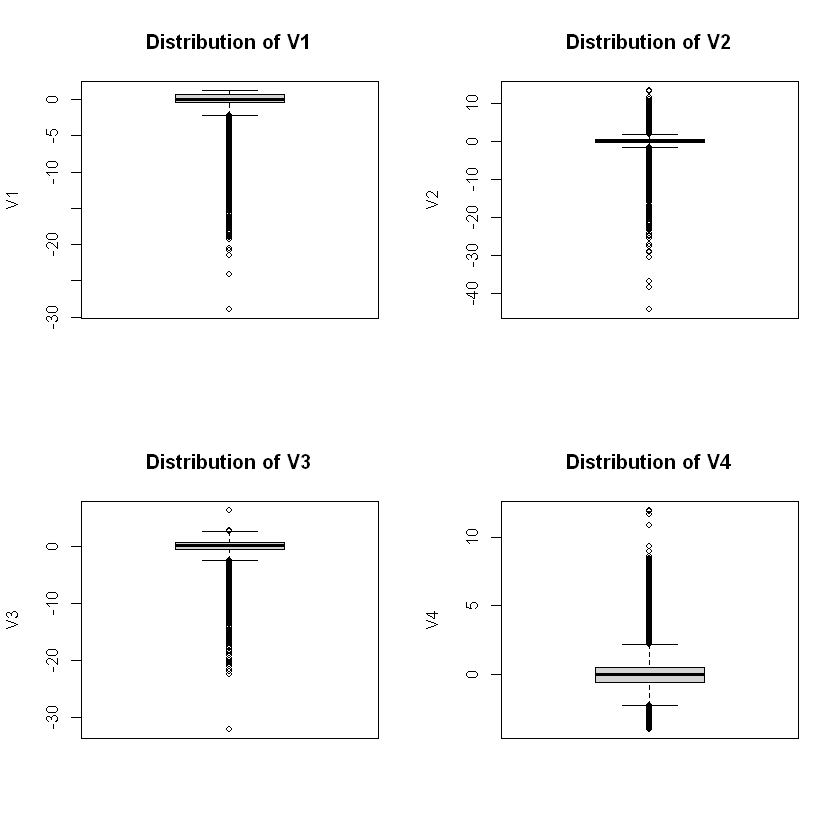

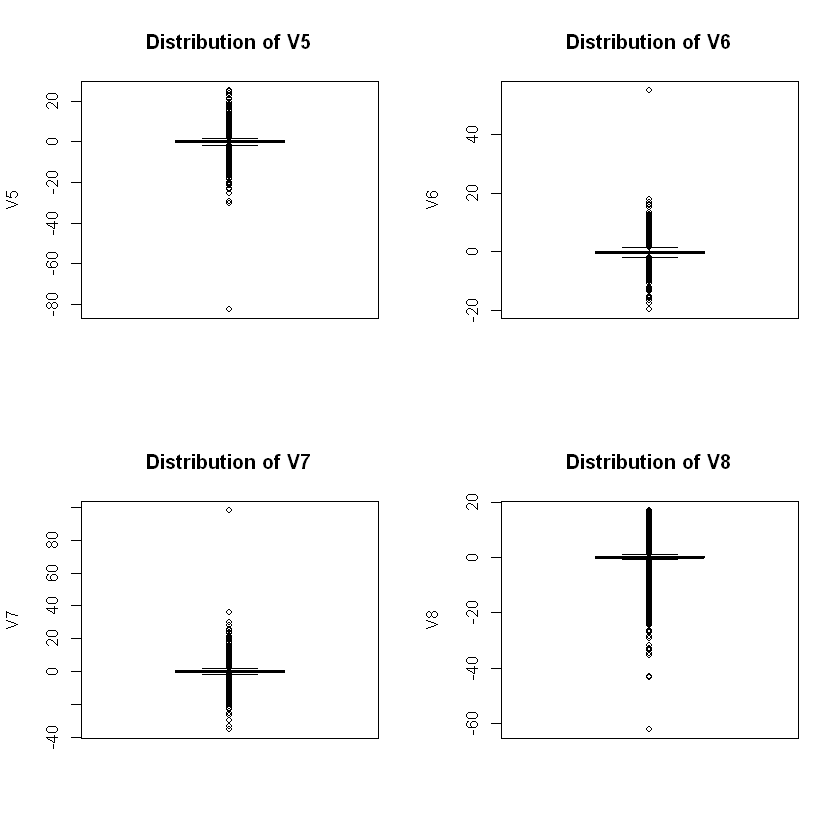

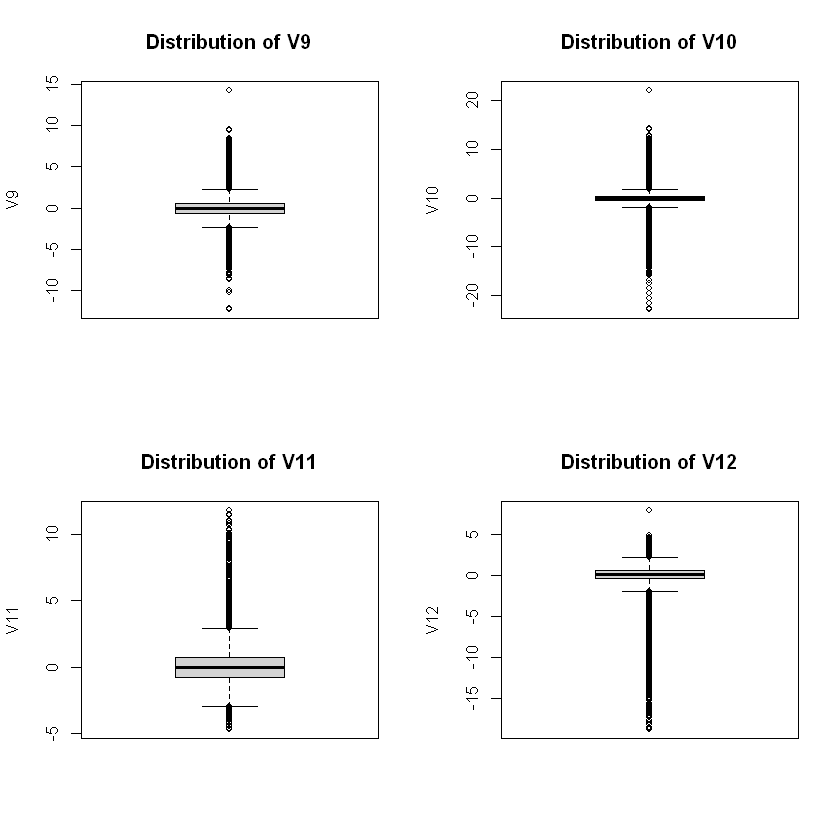

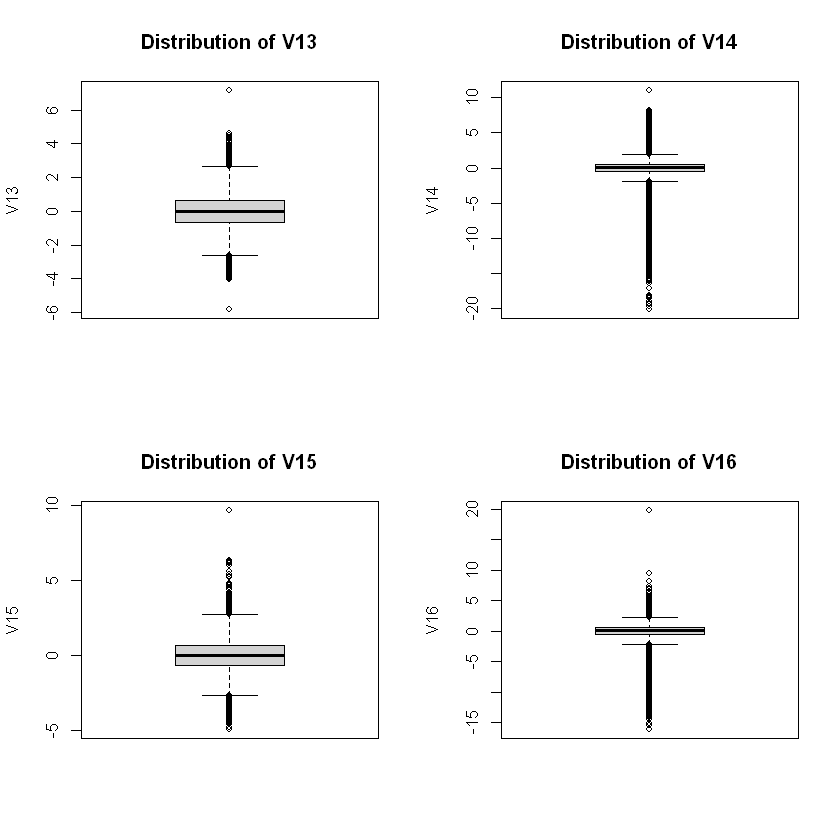

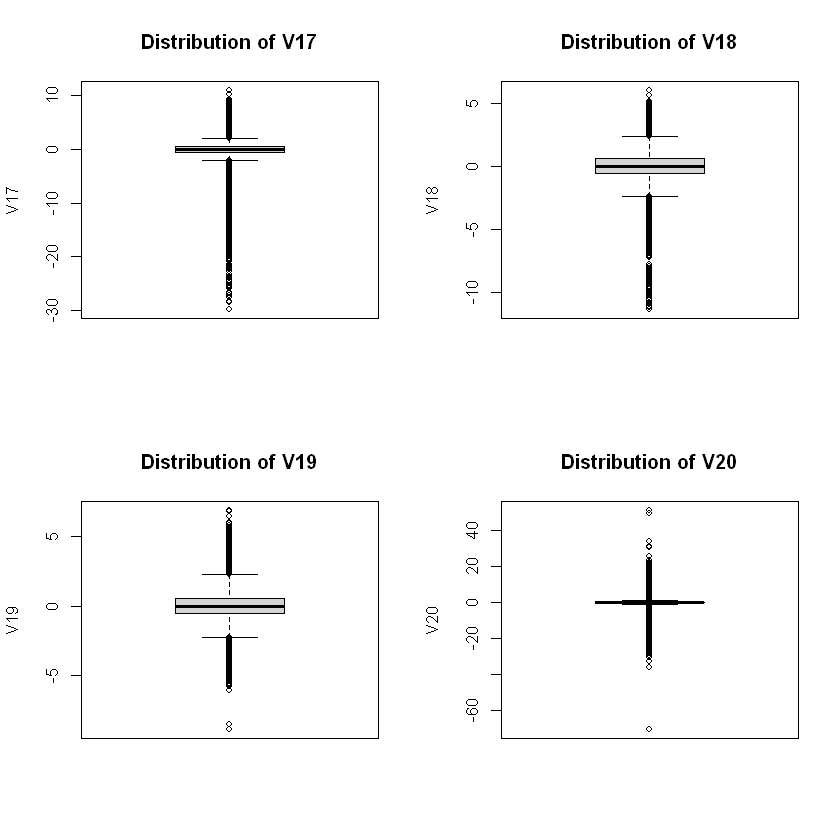

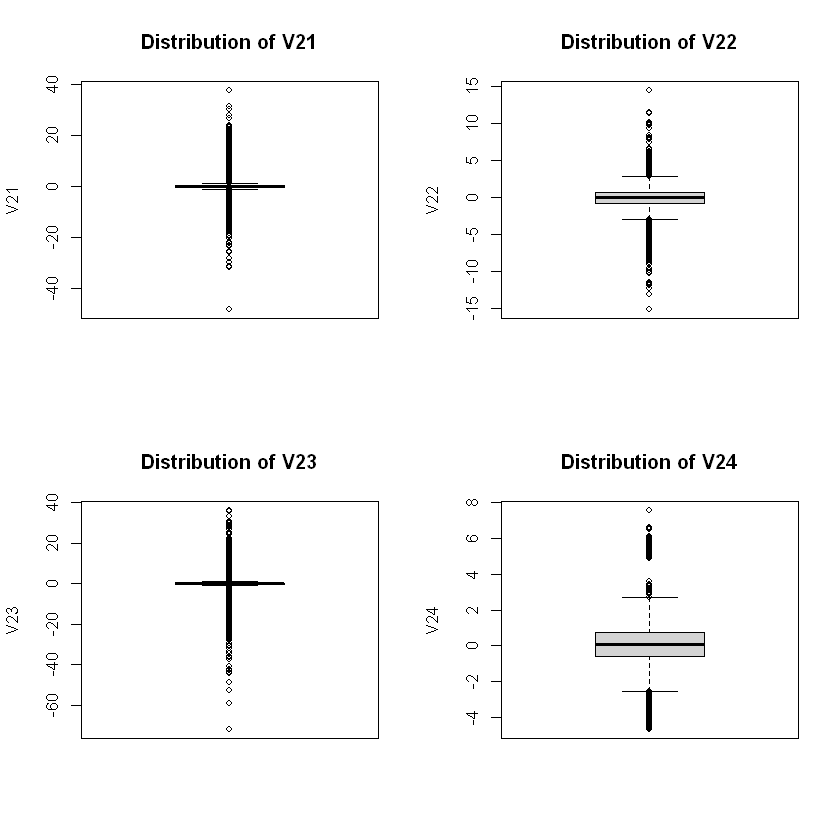

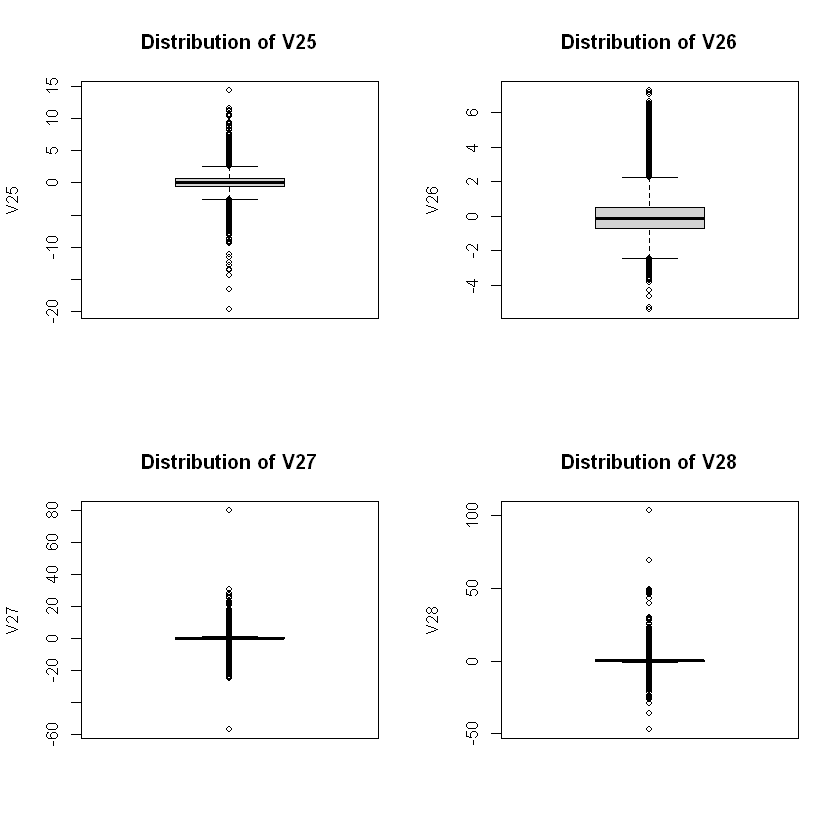

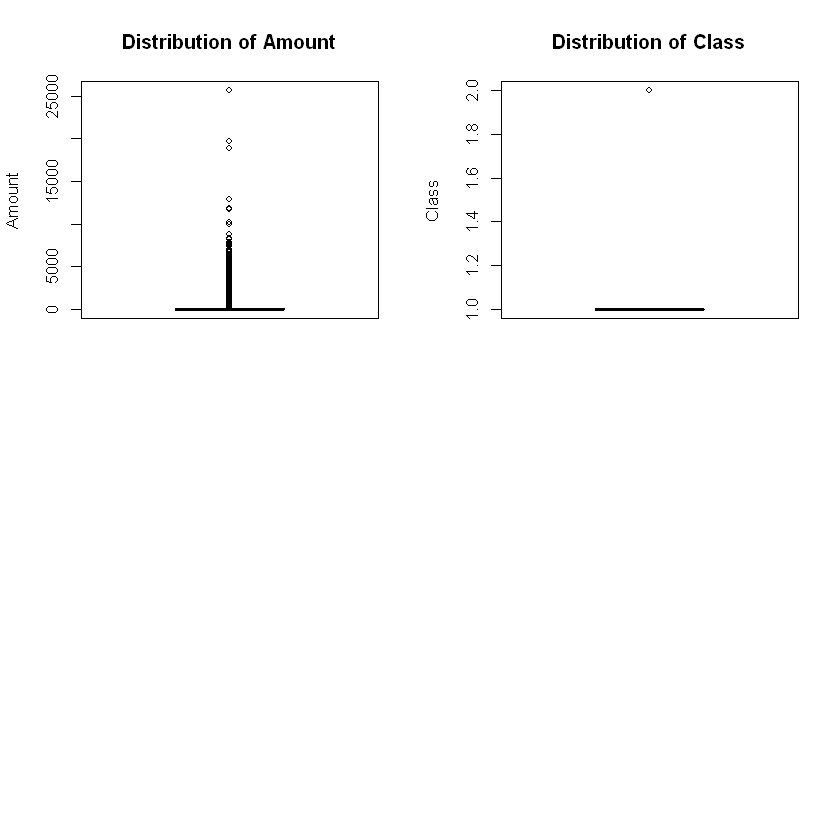

In [202]:
# BOX PLOT TO DISPLAY OUTLIERS

# Set up the plotting layout
par(mfrow=c(2,2)) 
# Create box plots for all numerical variables
for (i in 2:ncol(fraud)) {  # Start from the second column since the first one is "Time"
  boxplot(fraud[[i]], main = paste("Distribution of", names(fraud)[i]), ylab = names(fraud)[i])
}

# Function to calculate the number and proportion of outliers
calculate_outliers <- function(df, threshold = 3) {
  z_scores <- apply(df, 2, function(x) abs((x - mean(x, na.rm = TRUE)) / sd(x, na.rm = TRUE)))  # Z-scores for numeric columns
  outlier_rows <- apply(z_scores, 1, function(x) any(x > threshold))  # Rows with extreme Z-scores (outside threshold)
  outliers_numbers <- sum(outlier_rows)
  proportion_outliers <- outliers_numbers / nrow(df)
  return(list(Outliers = outliers_numbers, Proportion = proportion_outliers))
}

# Set the outlier threshold 
outlier_threshold <- 3

# Calculate outliers for the fraud data frame
outlier_info <- calculate_outliers(fraud, outlier_threshold)

# Print the number and proportion of outliers
print(paste("Number of outliers:", outlier_info$Outliers))
print(paste("Proportion of outliers:", outlier_info$Proportion))

**Correlation**

In [203]:
# Subset the data to include only numeric variables
numeric_data <- fraud[, sapply(fraud, is.numeric)]
# Calculate the correlation matrix
correlation_matrix <- cor(numeric_data)
round(correlation_matrix, 2)
correlation_matrix

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Time,1.00,0.12,-0.01,-0.42,-0.11,0.17,-0.06,0.09,-0.04,-0.01,⋯,-0.05,0.05,0.14,0.05,-0.02,-0.23,-0.04,-0.01,-0.01,-0.01
V1,0.12,1.00,0.01,-0.01,0.00,-0.01,0.00,-0.01,0.00,0.00,⋯,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.02,0.00,-0.23
V2,-0.01,0.01,1.00,0.01,0.00,0.01,0.00,0.01,0.00,0.00,⋯,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,-0.53
V3,-0.42,-0.01,0.01,1.00,0.00,-0.01,0.00,-0.01,0.00,0.00,⋯,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.01,0.00,-0.21
V4,-0.11,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,⋯,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.10
V5,0.17,-0.01,0.01,-0.01,0.00,1.00,0.00,-0.01,0.00,0.00,⋯,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.01,0.00,-0.39
V6,-0.06,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,⋯,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.22
V7,0.09,-0.01,0.01,-0.01,0.00,-0.01,0.00,1.00,-0.01,0.00,⋯,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.40
V8,-0.04,0.00,0.00,0.00,0.00,0.00,0.00,-0.01,1.00,0.00,⋯,0.00,0.02,-0.01,0.00,0.00,0.00,0.00,0.00,0.00,-0.10
V9,-0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,⋯,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,-0.04


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Time,1.000000000,0.1179266030,-0.0105555719,-4.220538e-01,-0.1058448928,1.732230e-01,-6.327934e-02,8.533518e-02,-3.820313e-02,-7.861473e-03,⋯,-5.102152e-02,0.0459126634,1.437273e-01,5.147407e-02,-1.595427e-02,-2.332616e-01,-4.181832e-02,-5.171416e-03,-9.304984e-03,-1.055883e-02
V1,0.117926603,1.0000000000,0.0068749355,-8.111812e-03,0.0022573276,-7.036016e-03,4.128357e-04,-9.173080e-03,-1.168269e-03,1.828040e-03,⋯,-1.392896e-03,0.0028175227,-1.436252e-03,-1.330430e-03,-7.230448e-04,-2.224914e-04,-6.836594e-04,-1.570619e-02,-4.860581e-03,-2.301053e-01
V2,-0.010555572,0.0068749355,1.0000000000,5.278252e-03,-0.0014952611,5.209894e-03,-5.944499e-04,7.424774e-03,2.899226e-03,-2.739687e-04,⋯,-1.287459e-03,-0.0048971648,1.237130e-03,-3.854664e-03,7.005669e-04,-1.569123e-03,2.532207e-04,7.554740e-03,1.611321e-03,-5.334280e-01
V3,-0.422053810,-0.0081118122,0.0052782517,1.000000e+00,0.0028287819,-6.878571e-03,-1.511482e-03,-1.172139e-02,-1.814670e-03,-3.578921e-03,⋯,-2.268501e-03,0.0034998716,-2.747377e-04,4.490740e-04,-7.219221e-05,4.251038e-04,-9.431455e-05,-7.050644e-03,-1.341624e-04,-2.124100e-01
V4,-0.105844893,0.0022573276,-0.0014952611,2.828782e-03,1.0000000000,1.744216e-03,-8.804138e-04,4.656984e-03,8.904924e-04,2.154400e-03,⋯,3.181437e-04,-0.0010337817,1.154014e-04,7.320911e-04,-1.198895e-04,1.616877e-04,7.769988e-04,1.321989e-03,2.310926e-04,9.951434e-02
V5,0.173223011,-0.0070360158,0.0052098935,-6.878571e-03,0.0017442162,1.000000e+00,-9.375118e-04,-8.708848e-03,1.430492e-03,-1.212831e-03,⋯,-1.184740e-03,0.0016223475,-5.587086e-04,1.183230e-03,1.978853e-04,6.905195e-05,3.904259e-04,-5.798027e-03,-8.200772e-04,-3.876853e-01
V6,-0.063279338,0.0004128357,-0.0005944499,-1.511482e-03,-0.0008804138,-9.375118e-04,1.000000e+00,4.363105e-04,3.035786e-03,-7.338978e-04,⋯,-1.810128e-04,-0.0021336821,1.103627e-03,-7.553723e-04,1.202149e-03,6.970064e-04,-2.803859e-05,2.892465e-04,9.246284e-04,2.163888e-01
V7,0.085335181,-0.0091730804,0.0074247740,-1.172139e-02,0.0046569837,-8.708848e-03,4.363105e-04,1.000000e+00,-6.419315e-03,-4.921428e-03,⋯,-1.192162e-03,0.0090101010,-2.280236e-03,3.303484e-03,-3.844088e-04,-7.247179e-05,6.238846e-04,-4.536867e-03,1.656569e-03,4.004080e-01
V8,-0.038203126,-0.0011682694,0.0028992257,-1.814670e-03,0.0008904924,1.430492e-03,3.035786e-03,-6.419315e-03,1.000000e+00,1.038355e-03,⋯,2.714638e-04,0.0188922857,-6.156169e-03,4.993690e-03,1.125062e-04,1.062315e-05,-1.406784e-03,6.132571e-04,-9.929007e-05,-1.046616e-01
V9,-0.007861473,0.0018280398,-0.0002739687,-3.578921e-03,0.0021543998,-1.212831e-03,-7.338978e-04,-4.921428e-03,1.038355e-03,1.000000e+00,⋯,-1.837668e-03,0.0006787735,7.845610e-04,6.768840e-04,-1.030833e-04,-2.751723e-04,1.253499e-03,8.221063e-03,5.591210e-03,-4.412251e-02


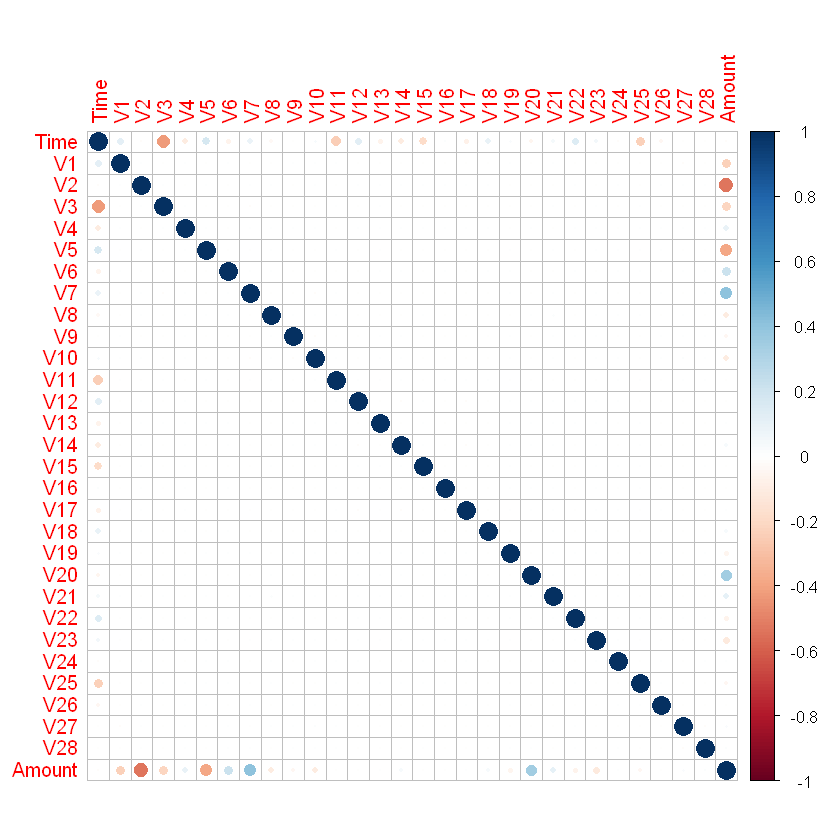

In [204]:
corrplot(correlation_matrix)

**Factor Target Variable**

In [205]:
# Convert "Class" to a factor with two levels (0 and 1)
fraud$Class <- as.factor(fraud$Class)

**Nomalization**

In [206]:
# Function to perform Min-Max scaling normalization
min_max_scaling <- function(x) {
  (x - min(x)) / (max(x) - min(x))
}

# Apply Min-Max scaling normalization to numeric variables (excluding "Class")
normalized_fraud <- fraud %>%
  select(-Class) %>%
  mutate_if(is.numeric, min_max_scaling)
# print(normalized_fraud)

In [207]:
names(normalized_fraud)

[1] "Time"   "V1"     "V2"     "V3"     "V4"     "V5"     "V6"     "V7"    
 [9] "V8"     "V9"     "V10"    "V11"    "V12"    "V13"    "V14"    "V15"   
[17] "V16"    "V17"    "V18"    "V19"    "V20"    "V21"    "V22"    "V23"   
[25] "V24"    "V25"    "V26"    "V27"    "V28"    "Amount"

In [208]:
# Bind the normalized fraud data with the Class variable
normalized_fraud <- cbind(normalized_fraud, Class = fraud$Class)

In [209]:
names(normalized_fraud)

[1] "Time"   "V1"     "V2"     "V3"     "V4"     "V5"     "V6"     "V7"    
 [9] "V8"     "V9"     "V10"    "V11"    "V12"    "V13"    "V14"    "V15"   
[17] "V16"    "V17"    "V18"    "V19"    "V20"    "V21"    "V22"    "V23"   
[25] "V24"    "V25"    "V26"    "V27"    "V28"    "Amount" "Class"

In [210]:
str(normalized_fraud)

'data.frame':	283726 obs. of  31 variables:
 $ Time  : num  0.00 0.00 5.79e-06 5.79e-06 1.16e-05 ...
 $ V1    : num  0.935 0.979 0.935 0.942 0.939 ...
 $ V2    : num  0.766 0.77 0.753 0.765 0.777 ...
 $ V3    : num  0.881 0.84 0.868 0.868 0.864 ...
 $ V4    : num  0.313 0.272 0.269 0.214 0.27 ...
 $ V5    : num  0.763 0.766 0.762 0.766 0.763 ...
 $ V6    : num  0.268 0.262 0.281 0.276 0.264 ...
 $ V7    : num  0.267 0.265 0.27 0.267 0.269 ...
 $ V8    : num  0.786 0.786 0.788 0.789 0.782 ...
 $ V9    : num  0.475 0.454 0.411 0.415 0.491 ...
 $ V10   : num  0.511 0.505 0.513 0.508 0.524 ...
 $ V11   : num  0.252 0.381 0.322 0.272 0.236 ...
 $ V12   : num  0.681 0.744 0.707 0.711 0.724 ...
 $ V13   : num  0.372 0.486 0.504 0.488 0.553 ...
 $ V14   : num  0.636 0.641 0.64 0.636 0.608 ...
 $ V15   : num  0.446 0.384 0.512 0.289 0.349 ...
 $ V16   : num  0.434 0.464 0.357 0.416 0.435 ...
 $ V17   : num  0.737 0.728 0.763 0.711 0.724 ...
 $ V18   : num  0.655 0.641 0.645 0.788 0.651 ...
 $ V

**Balance Data Using Over Sampling**

In [211]:
# Summary statistics for categorical variable (Class)
table(normalized_fraud$Class)


     0      1 
283253    473 

In [212]:
# Over-sampling the minority class using SMOTE
balance_fraud <- ovun.sample(Class ~ ., data = normalized_fraud, method = "both", N = nrow(normalized_fraud), seed = 42)$data

In [213]:
table(balance_fraud$Class)


     0      1 
142003 141723 

## **First Model**

In [214]:
Model1 <- glm(Class ~ ., data = balance_fraud, family = binomial)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


In [215]:
summary(Model1)


Call:
glm(formula = Class ~ ., family = binomial, data = balance_fraud)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.2499     3.9455  -0.317  0.75141    
Time         -1.3441     0.0514 -26.149  < 2e-16 ***
V1           30.2502     0.9824  30.793  < 2e-16 ***
V2           43.6925     2.4165  18.081  < 2e-16 ***
V3           10.9925     0.8004  13.733  < 2e-16 ***
V4           17.0688     0.2122  80.429  < 2e-16 ***
V5           90.4328     2.9437  30.721  < 2e-16 ***
V6          -47.4666     1.4096 -33.674  < 2e-16 ***
V7          -66.9196     3.9776 -16.824  < 2e-16 ***
V8          -36.9629     0.9241 -40.000  < 2e-16 ***
V9           -7.3729     0.3982 -18.518  < 2e-16 ***
V10         -28.9329     0.8840 -32.731  < 2e-16 ***
V11           6.8948     0.2113  32.637  < 2e-16 ***
V12         -23.7262     0.4511 -52.599  < 2e-16 ***
V13          -4.4865     0.1203 -37.278  < 2e-16 ***
V14         -36.3317     0.5680 -63.963  < 2e-16 ***
V15        

In [ ]:
par(mfrow=c(2,2))
plot(Model1)

In [ ]:
actual_value1 <- balance_fraud$Class
# Predicted values
predicted_value1 <- round(fitted(Model1))
Result1 <- table(actual_value1, predicted_value1)
(Result1)

In [ ]:
accuracy <- sum(diag(Result1))/sum(Result1)
accuracy

In [ ]:
# Create confusion matrix object
confusion_matrix_1 <- confusionMatrix(factor(predicted_value1), factor(balance_fraud$Class))

# Print the confusion matrix
print(confusion_matrix_1)

# Print summary statistics
print(confusion_matrix_1$overall)

## **SECOND MODEL AND WITH PRE-PROCESSING STEPS**

**Removing Remove Outliers**

In [ ]:
# removing outliers
# Function to remove outliers using IQR method
remove_outliers <- function(data, threshold = 1.5) {
  # Exclude non-numeric variables (assuming 'Class' is the target variable)
  numeric_data <- data[, sapply(data, is.numeric)]
  
  # Calculate IQR for each numeric variable
  Q1 <- apply(numeric_data, 2, quantile, probs = 0.25)
  Q3 <- apply(numeric_data, 2, quantile, probs = 0.75)
  IQR <- Q3 - Q1
  
  # Identify outliers for each variable
  outliers <- sapply(1:ncol(numeric_data), function(i) {
    lower_bound <- Q1[i] - threshold * IQR[i]
    upper_bound <- Q3[i] + threshold * IQR[i]
    numeric_data[, i] < lower_bound | numeric_data[, i] > upper_bound
  })
  
  # Remove rows containing outliers
  cleaned_fraud <- data[!apply(outliers, 1, any), ]
  
  return(cleaned_fraud)
}

# Remove outliers from your dataset
cleaned_fraud <- remove_outliers(balance_fraud)

In [ ]:
nrow(cleaned_fraud)

**Feature Selection**

In [ ]:
# Calculate the point-biserial correlation between all numeric predictors and the target variable 'Class'
check_correlations <- sapply(cleaned_fraud[, sapply(cleaned_fraud, is.numeric)], function(x) cor(x, as.numeric(cleaned_fraud$Class)))

# Absolute correlation values
correlations_target <- abs(check_correlations)

# Rank the features by their correlation with 'Class'
correlation_ordered <- sort(correlations_target, decreasing = TRUE)

# Display the sorted features
correlation_ordered

In [ ]:
# Define a threshold 
threshold <- 0.05

# Identify features that have a correlation higher than the threshold
Selected_features <- names(correlations_target[correlations_target > threshold])
Selected_features

In [ ]:
Selected_fraud <- cleaned_fraud[,Selected_features]
Selected_fraud$Class <- cleaned_fraud$Class

In [ ]:
names(Selected_fraud)

In [ ]:
ncol(Selected_fraud)

In [ ]:
str(Selected_fraud)

**SECOND MODEL**

In [ ]:
#Create logistic regression model
Model2 <- glm(Class ~ ., data = Selected_fraud, family = binomial)

In [ ]:
summary(Model2)

In [ ]:
par(mfrow=c(2,2))
plot(Model2)

In [ ]:
actual_value2 <- Selected_fraud$Class
# Predicted values
predicted_value2 <- round(fitted(Model2))
Result2 <- table(actual_value2, predicted_value2)
(Result2)

In [ ]:
accuracy2 <- sum(diag(Result2))/sum(Result2)
accuracy2

In [ ]:
# Create confusion matrix object
confusion_matrix_2 <- confusionMatrix(factor(predicted_value2), factor(Selected_fraud$Class))

# Print the confusion matrix
print(confusion_matrix_2)

# Print summary statistics
print(confusion_matrix_1$overall)

# **THIRD MODEL USING PCA**

In [ ]:
# Check structure of Selected_fraud
str(Selected_fraud)

In [ ]:
# Data preparation
Selected_fraud$Class <- as.numeric(as.character(Selected_fraud$Class))

In [ ]:
# Adequacy tests
Bartlett_fraud <- bartlett.test(Selected_fraud)
Bartlett_fraud$p.value

In [ ]:
KMO_fraud <- psych::KMO(Selected_fraud)
KMO_fraud$MSA

In [ ]:
# Performing PCA
PCA_fraud <- prcomp(Selected_fraud, scale. = TRUE)
variance_explained <- PCA_fraud$sdev^2 / sum(PCA_fraud$sdev^2)
percentage_explained <- variance_explained * 100
plot(percentage_explained, type = "line", main = "Scree Plot", xlab = "Principal Component", ylab = "Percentage of Variance Explained")

In [ ]:
# Create the scree plot
plot(percentage_explained, type = "line", main = "Scree Plot", xlab = "Principal Component", ylab = "Percentage of Variance Explained")

In [ ]:
# Combine PCA scores with Class
PCA_scores <- predict(PCA_fraud)
PCA_fraud <- as.data.frame(cbind(PCA_scores, Class = Selected_fraud$Class))

In [ ]:
# Cumulative variance explained
cumulative_Variance <- cumsum(variance_explained)
plot(1:length(cumulative_Variance), cumulative_Variance, 
     type = "b", main = "Cumulative Scree Plot", xlab = "Number of Components", 
     ylab = "Cumulative Proportion of Variance Explained")

**Model Modelling**

In [ ]:
# Logistic Regression Model
Model3 <- glm(Class ~ ., data = PCA_fraud, family = binomial)

In [ ]:
#Summary of the model
summary(Model3)

In [ ]:
# Predictions and evaluation
predictions3 <- ifelse(predict(Model3, type = "response") > 0.5, 1, 0)

In [ ]:
#Create confusion matrix
confusion_matrix3 <- confusionMatrix(factor(predictions3), factor(Selected_fraud$Class))

In [ ]:
#Print confusion matrix
confusion_matrix3

In [ ]:
# Print summary statistics
print(confusion_matrix3$overall)